---
jupytext:
  formats: md:myst
  text_representation:
    extension: .md
    format_name: myst
kernelspec:
  display_name: Python 3
  language: python
  name: python3
---

# Data Wrangling

Data wrangling varies with each dataset and project, but we can generally distinguish between basic data wrangling that’s universal and analysis-specific wrangling.

In this lab, we will focus on basic data wrangling. You'll first go through a guided exercise to learn how to leverage GenAI for this purpose. Afterward, you'll have the opportunity to use GenAI on your own to tackle a range of different wrangling exercises. 

The general workflow for these tasks is:

 - __Understanding the Issue__: Understand what needs to be addressed.
 - __Developing a Strategy__: Plan your approach to solving the problem.
 - __Implementing a Solution__: Figure out the details of solving the problem.
 - __Troubleshooting__: Address any issues that arise during the process (as needed).ed).


In this notebook, you'll encounter specific indicators to prompt your actions:

:::{tip} Use GenAI
This cue invites you to use GenAI for problem-solving. You can try your own prompt or use the provided example.
:::{dropdown} Example Prompt
This is where you’d find an example prompt you could paste into your GenAI tool of choice.
:::

:::{warning} Show AI-Solution
:class: dropdown
If, for any reason, you cannot use a GenAI chatbot, you have the option to refer to a solution generated with our example prompt. However, to maximize learning, we encourage you to generate and apply your own solutions, as the course aims to develop your independent use of AI tools.
:::

:::{tip} AI-Sandbox
There will be blocks like this, showing you a code block where you can paste and execute your own AI-generated code. These blocks usually follow guided instructions on the prompts you want to use and the problem you are solving.
:::

In [8]:
# They will be followed by an editable code block like this. You can enter your code from the next line!

## Guided exercise on wrangling with GenAI

You’ve been given a CSV file and are tasked with cleaning the data. While there may be some glaring issues that you can see if you open the file in a spreadsheet editor (like Excel), that’s not always a feasible approach. Sometimes there’s too much data to go through everything manually and sometimes the problems are subtle and can easily be missed by a human observer (human-error is often the reason the issue was there in the first place). 


Let's start by importing the required libraries and loading the CSV file for `shopping_behavior`  dataset in the `Kaggle Ecommerce` and examining the data to identify errors.

First we load the necessary libraries (i.e. the prewritten code from packages). 

```{dropdown} Click to show/hide code

```{code-cell} ipython3
# Importing necessary libraries

from pathlib import Path  # Module for handling file paths
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical computations

These have already been installed here, but if you were to run these locally without having them, you’d get an error and need to install them first.

Then we can read in our CSV file as a DataFrame so we can use it in our Python environment.

In [ ]:
# Define the relative path to the dataset CSV file
file_path = Path("..") / "Datasets" / "Kaggle_Ecommerce" / "shopping_behavior.csv"
# Read the CSV file into a pandas DataFrame
shop_behav = pd.read_csv(file_path)
# Display the first 5 rows of the DataFrame
shop_behav.head()

## A General Checklist

In this case, it’s important to go through some basic quality control by going through a checklist of common issues.

:::{tip} Use GenAI
Use GenAI as an educational tool to learn about common data cleaning issues you might face so that you can make a checklist of our possible issues.
:::{dropdown} Example Prompt
What are common data cleaning issues I should look out for when preparing a dataset for analysis?

:::

:::{warning} Show AI-Solution
:class: dropdown

Data cleaning is crucial to ensure the integrity of your analysis. Here are some common issues to watch out for:

1. **Missing Values**: Incomplete datasets can lead to biased or incorrect results. You’ll need to decide whether to impute missing values, remove the affected rows, or even ignore them, depending on the situation and the proportion of missing data.
   
2. **Duplicate Data**: Redundant entries can skew your analysis, leading to overestimated significance or effects. Identifying and removing duplicates is essential, especially in datasets where entries should be unique.
   
3. **Inconsistent Formats**: Data collected from different sources or methods might have varying formats. For instance, dates might be recorded as DD-MM-YYYY in one part and MM-DD-YYYY in another. Standardizing these into a single format is necessary for accurate analysis.
   
4. **Outliers and Anomalies**: Extreme values can significantly affect the results of your analysis. Determining whether outliers are due to data entry errors, measurement errors, or genuine extreme variations is important. Sometimes, outliers are insightful; other times, they are just noise.
   
5. **Incorrect Data Types**: Numerical values recorded as strings, categorical data treated as continuous, etc., can mess up data processing. Converting data to appropriate types is crucial.
   
6. **Typos and Spelling Errors**: Errors in categorical data can create artificially inflated categories. For example, 'Brown' vs. 'Borwn' in color categories. These need to be corrected through spelling checks or manual review.
   
7. **Scale and Unit Inconsistencies**: Ensure all data points are measured on the same scale and units (e.g., kilograms vs. pounds, or meters vs. feet) to maintain consistency across the dataset.
   
8. **Encoding Issues**: Problems with character encoding can lead to strange characters appearing in your dataset, especially if the data comes from multiple international sources.
   
9. **Irrelevant or Redundant Features**: Not all features in your dataset may be relevant to your analysis. Identifying and removing irrelevant or redundant features can simplify your model and improve performance.

Addressing these issues thoroughly can enhance the quality of your analysis and help you draw more accurate conclusions from your data.
:::


## Going through the specifics


Now that you have your list, it’s time to address these issues. Not all of them will be relevant, but it’s a good idea to check for as many of them as you can. Since we made the dataset, we know what’s wrong with it so you can have the advantage of knowing which issues we’ll deal with.

Let’s walk through solving our first problem together and focus on missing values.

### 1. Understanding the issue

:::{tip} Use GenAI
Use GenAI to figure out how to handle missing values. Since this is a pretty easy problem to solve, you can ask for how to identify the issue and solve it in one go.
:::{dropdown} Example Prompt
How can I identify and handle missing data in a Python DataFrame?
:::

:::{warning} Show AI-Solution
:class: dropdown
## Identifying and Handling Missing Data in a DataFrame

### Identifying Missing Data

To identify missing data in a DataFrame, we can use the `isnull()` or `isna()` method, which will return a DataFrame of the same shape, but with boolean values indicating the presence of missing data.

```python
import pandas as pd

# Sample DataFrame
data = {
    'A': [1, 2, None, 4],
    'B': [None, 2, 3, 4],
    'C': [1, 2, 3, None]
}
df = pd.DataFrame(data)

# Identifying missing data
missing_data = df.isnull()
print(missing_data)
```
To get a summary of the missing data, we can use the `sum()` method along with `isnull()`.

```python
# Summary of missing data
missing_summary = df.isnull().sum()
print(missing_summary)
```
### Handling Missing Data

There are several strategies to handle missing data:

#### Removing Missing Data:

- **Remove rows with any missing values:**

```python
df_dropped_rows = df.dropna()
print(df_dropped_rows)
```
- **Remove columns with any missing values:**

```python
df_dropped_columns = df.dropna(axis=1)
print(df_dropped_columns)
```
#### Filling Missing Data:

- **Fill missing values with a specific value:**

```python
df_filled_value = df.fillna(0)
print(df_filled_value)
```
- **Fill missing values using forward fill (propagate last valid observation forward):**

```python
df_filled_forward = df.fillna(method='ffill')
print(df_filled_forward)
```
- **Fill missing values using backward fill (propagate next valid observation backward):**

```python
df_filled_backward = df.fillna(method='bfill')
print(df_filled_backward)
```
- **Fill missing values with the mean of the column:**

```python
df_filled_mean = df.apply(lambda col: col.fillna(col.mean()), axis=0)
print(df_filled_mean)
```
### Choosing the Right Method

The method you choose to handle missing data depends on the context of your analysis and the nature of the data. For example, if missing values are few and scattered, filling them with the mean might be a good choice. However, if a column has a large proportion of missing values, it might be better to drop that column.

Always consider the impact of your chosen method on the integrity and validity of your analysis.

:::

### 2. Developing a strategy

:::{tip} Use GenAI
Use GenAI to help you make your decision about what to do. Think about how to prompt it so it doesn’t assume you know the right answer.
:::{dropdown} Example Prompt
I've noticed missing values in my dataset and I'm unsure how to handle them. Should I leave them, remove the rows/columns, or fill in the gaps? Can you provide the pros and cons of each option and what factors I should consider about my data and goals to make the best decision?
To illustrate the full approach, let’s just say that I’ve made the executive decision to remove missing values.

:::

:::{warning} Show AI-Solution
:class: dropdown
## Handling Missing Data: Removing Missing Values

When dealing with missing data in a dataset, one common approach is to remove the rows or columns containing missing values. Here's a detailed look at the pros, cons, factors to consider, and an example workflow if you decide to remove missing values.

### Pros of Removing Missing Values

- **Simplicity:** Removing missing values is straightforward and easy to implement.
- **Preserves Data Integrity:** Avoids making assumptions or imputations that could potentially skew analysis.
- **Compatibility:** Ensures compatibility with certain machine learning algorithms that do not handle missing data well.

### Cons of Removing Missing Values

- **Loss of Data:** Reduces the size of the dataset, potentially leading to loss of valuable information.
- **Bias:** If missing data are not randomly distributed, removing them could bias the analysis.
- **Impact on Representativeness:** Removing too many rows could affect the representativeness of the dataset.

### Factors to Consider

1. **Amount of Missing Data:**
   Evaluate how much data would be lost by removing missing values. If a significant portion of your data is missing, consider alternative methods like imputation.

2. **Data Distribution:**
   Determine if missing values are randomly distributed or if there's a pattern. Removing them might bias your analysis if there's a systematic reason for missing data.

3. **Impact on Results:**
   Consider the potential impact on your analysis and the goals of your study. Removing missing values may be acceptable if it doesn't compromise the integrity of your findings.

4. **Model Requirements:**
   Check if your machine learning or statistical models require complete datasets or specific preprocessing steps.

### Example Workflow

Here’s a simplified example of how you might proceed with removing missing values using Python and pandas:

```python
import pandas as pd

# Load your dataset
df = pd.read_csv('your_data.csv')

# Display initial count of missing values
print("Initial count of missing values:\n", df.isnull().sum())

# Remove rows with any missing values
df_clean = df.dropna()

# Display count of missing values after removal
print("Count of missing values after removal:\n", df_clean.isnull().sum())
```

### Conclusion

By deciding to remove missing values, you've opted for a straightforward approach to handling data gaps. It's essential to weigh the pros and cons carefully based on the specifics of your dataset, your analysis goals, and the requirements of the models you intend to use. 

- **Document Decisions:** Always document your decisions regarding handling missing data to ensure transparency and reproducibility.
- **Consider Sensitivity Analyses:** Conduct sensitivity analyses to assess how robust your findings are to different handling strategies for missing data.

This approach ensures that your dataset is cleaner and suitable for analysis, aligning with your specific analytical goals while maintaining data integrity.

:::

### 3. Implementing a solution

:::{tip} Use GenAI
Having made your decision about how to solve the problem now, you can use GenAI again to generate some concise code to identify rows with missing values and remove them.
:::{dropdown} Example Prompt
Generate Python code that will identify missing values and remove any rows with missing values. 
:::

:::{warning} Show AI-Solution
:class: dropdown
```python
import pandas as pd

# Load your dataset (replace 'your_data.csv' with your actual dataset)
df = pd.read_csv('your_data.csv')

# Identify missing values
print("Missing values before removal:\n", df.isnull().sum())

# Remove rows with any missing values
df_clean = df.dropna()

# Identify missing values after removal (should ideally show zeros)
print("Missing values after removal:\n", df_clean.isnull().sum())

# Optional: Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_clean.head())
```


In this code snippet:

- Replace `'your_data.csv'` with the path or name of your actual dataset file.
- `df.isnull().sum()` is used to check the number of missing values in each column before removing any rows.
- `df.dropna()` removes all rows containing any missing values.
- `df_clean.isnull().sum()` checks again for missing values in each column after removal to confirm that there are no missing values left.
- The `print(df_clean.head())` line optionally displays the cleaned DataFrame to verify the results.
:::

### 4. Troubleshooting

:::{tip} Use GenAI
Here is the DataFrame:

<br/>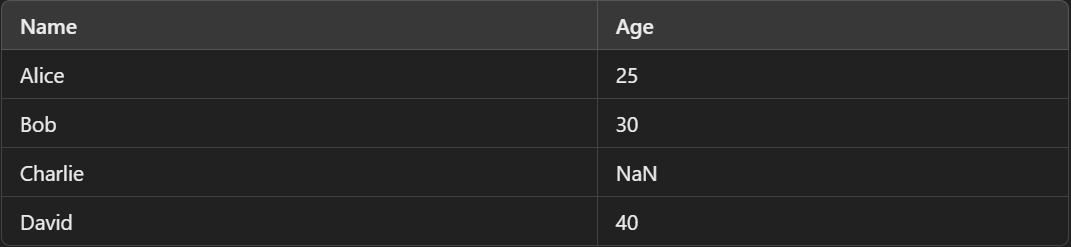0"/>


If you fill the missing value with mean, you will get 31.5 as the age, while our column is of type `Integer`. You have to be careful with these kinds of issues.
:::{dropdown} Example Prompt
How do I handle data-type issues when filling in the missing values in a DataFrame?
:::

:::{warning} Show AI-Solution
:class: dropdown
### Handling Data-Type Issues When Filling Missing Values in a DataFrame

1. **Identify Data-Type Mismatch:**
   Before filling missing values, check the data types of each column using `df.dtypes`. Ensure numeric columns are correctly represented as `int64` or `float64` and not as `object` or other incompatible types.

   ```python
   import pandas as pd
   
   # Example DataFrame
   data = {'A': [1, 2, None, 4, 5],
           'B': ['6', '7', '8', None, '10']}
   
   df = pd.DataFrame(data)
   
   # Display initial data types
   print("Initial data types:")
   print(df.dtypes)
    ```

2. **Convert Data Types if Necessary**

    If numeric columns are stored as strings (`object`), convert them using `pd.to_numeric()` or `astype()` to ensure compatibility for numerical operations and imputation.

```python
    # Convert 'B' column from string to numeric (int or float)
    df['B'] = pd.to_numeric(df['B'], errors='coerce')
    
    # Display data types after conversion
    print("\nData types after conversion:")
    print(df.dtypes)
```

3. **Handle Missing Values**

Choose an appropriate strategy (mean, median, mode, interpolation, constant) to fill missing values (`NaN`) in numeric columns after ensuring consistent data types.

```python
# Fill missing values in 'A' column with mean
mean_A = df['A'].mean()
df['A'] = df['A'].fillna(mean_A)

# Fill missing values in 'B' column with median (after conversion)
median_B = df['B'].median()
df['B'] = df['B'].fillna(median_B)

# Display DataFrame after filling missing values
print("\nDataFrame after filling missing values:")
print(df)
```

4. **Validate Data Types After Imputation**

After filling missing values, verify the data types of columns using `df.dtypes` to ensure consistency and compatibility with your analysis requirements.

```python
# Validate data types after filling missing values
print("\nData types after filling missing values:")
print(df.dtypes)
```

By following these steps in your data preprocessing pipeline, you can effectively handle data-type issues when filling missing values in a DataFrame, ensuring data integrity and compatibility for subsequent analysis or modeling tasks.

:::

## DIY Data Wrangling with GenAI

Here are some tasks ranked from simple to advanced that you can tackle with GenAI solutions:

1. **Duplicates Removal**
   - **Problem:** Identify and remove duplicate rows from a dataset.
   - **Prompt:** I want to identify and remove duplicate rows from a dataset. Provide a solution to ensure data cleanliness by detecting identical rows based on selected columns.

2. **Creating New Columns**
   - **Problem:** Combine existing columns (e.g., 'LATITUDE' and 'LONGITUDE') into a new column ('COORDINATES').
   - **Prompt:** Help me in creating a new column named 'COORDINATES' by combining the 'LATITUDE' and 'LONGITUDE' columns as strings. Provide a solution using string manipulation functions to concatenate values from multiple columns.

3. **Merging CSVs**
   - **Problem:** Combine multiple CSV files located in a directory ('../Datasets/NOAA_Weather') into a single dataset.
   - **Prompt:** How can I merge multiple CSV files located in a directory into a single dataset? Utilize file handling and data integration techniques to seamlessly combine separate datasets for comprehensive analysis.
